# Importing necessary libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
#load dataset
df = pd.read_csv('spam-dataset.csv',encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


In [3]:
#display first five rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# Some basic statistical analysis about the data
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# Checking  summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Preprocessing

In [9]:
# Preprocess text: lowercasing, removing special characters
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

In [10]:
df['message'] = df['message'].apply(preprocess_text)

# Exploratory Data Analysis¶

In [7]:
# Convert labels to binary (spam=1, ham=0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


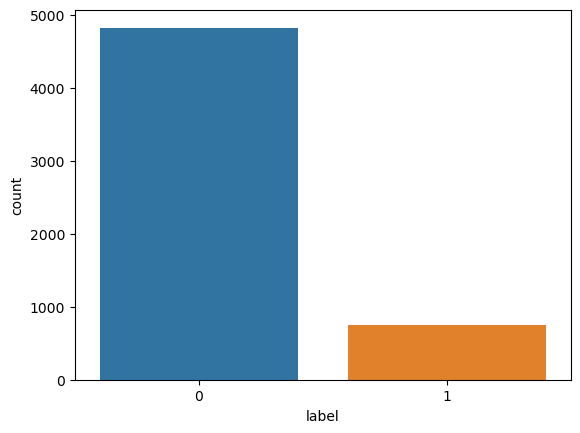

In [8]:
sns.countplot(x=df['label'])
plt.show()

# Model training

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Feature Extraction with TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Evaluation

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



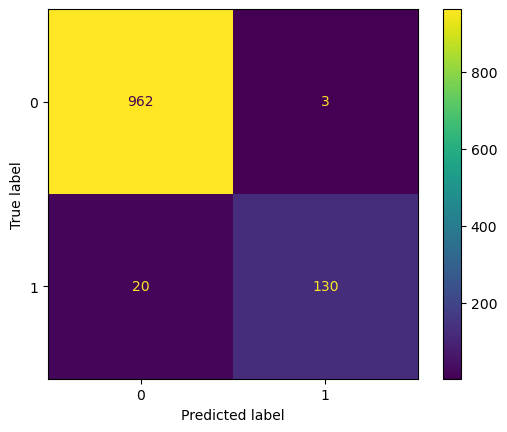

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_tfidf, y_test)